# Logistic Regression for Titanic Survival Predictions

### Importing Libraries and Reading dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\titanic\\train.csv')
TestData = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\titanic\\test.csv')

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Analysing Relation between independent and dependent variables

<AxesSubplot:xlabel='Survived', ylabel='count'>

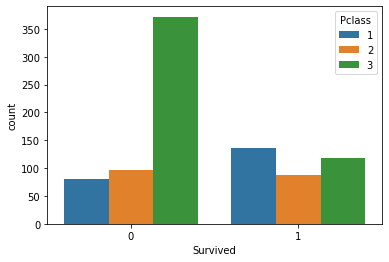

In [14]:
sns.countplot(x = 'Survived', data = data, hue = 'Pclass')

<AxesSubplot:>

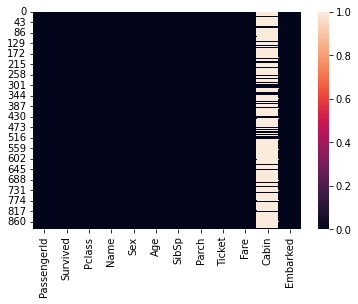

In [26]:
sns.heatmap(data.isna())

<AxesSubplot:>

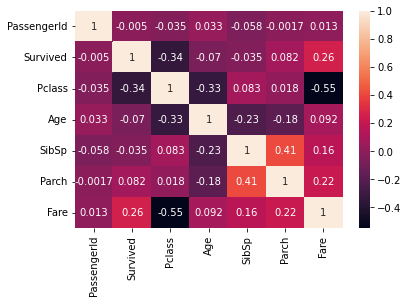

In [25]:
sns.heatmap(data.corr(), annot=True)

### Checking and Filling Null Values
#### (Training Data)
Filling Null cells with mean

In [24]:
data['Age'].isna().sum()


0

In [22]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

### Transforming training data for modeling

In [32]:

data.drop('Name', axis = 1, inplace = True)
data.drop('Ticket', axis = 1, inplace = True)
data.drop('Embarked', axis = 1, inplace = True)

In [33]:
data.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
886,887,0,2,male,27.000000,0,0,13.00
887,888,1,1,female,19.000000,0,0,30.00
888,889,0,3,female,29.699118,1,2,23.45
889,890,1,1,male,26.000000,0,0,30.00
890,891,0,3,male,32.000000,0,0,7.75


In [41]:
data['Sex'] = data['Sex'] == 'male'

In [44]:
data['Sex'] = 1*data['Sex']

In [45]:
data.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
886,887,0,2,1,27.000000,0,0,13.00
887,888,1,1,0,19.000000,0,0,30.00
888,889,0,3,0,29.699118,1,2,23.45
889,890,1,1,1,26.000000,0,0,30.00
890,891,0,3,1,32.000000,0,0,7.75


In [47]:
y = data['Survived']
x = data

In [48]:
x.drop('Survived', axis =1, inplace = True)

In [51]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.2500
1,2,1,0,38.0,1,0,71.2833
2,3,3,0,26.0,0,0,7.9250
3,4,1,0,35.0,1,0,53.1000
4,5,3,1,35.0,0,0,8.0500


### Transforming training data for modeling

In [52]:
TestData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
TestData.drop(['Name', 'Cabin', 'Embarked'], axis = 1, inplace= True)

In [56]:
TestData.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,892,3,1,34.5,0,0,330911,7.8292
1,893,3,0,47.0,1,0,363272,7.0000
2,894,2,1,62.0,0,0,240276,9.6875
3,895,3,1,27.0,0,0,315154,8.6625
4,896,3,0,22.0,1,1,3101298,12.2875


In [55]:
TestData['Sex'] = 1*(TestData['Sex'] == 'male')

### Checking and Filling Null Values
#### (Testing Data)
Filling Null cells with mean

In [58]:
TestData['Age'].mean()

30.272590361445783

In [59]:
TestData['Age'].fillna(TestData['Age'].mean(), inplace = True)

<AxesSubplot:>

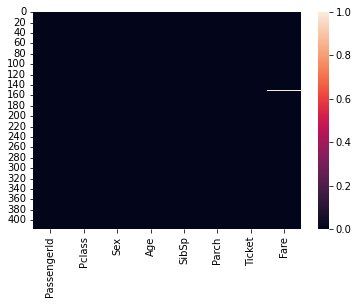

In [61]:
sns.heatmap(TestData.isna())

In [62]:
TestData['Fare'].fillna(TestData['Fare'].mean(), inplace = True)

<AxesSubplot:>

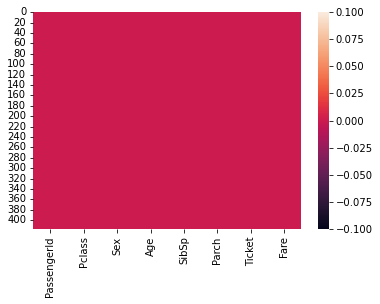

In [63]:
sns.heatmap(TestData.isna())

## Creating model and fitting data

In [64]:
model = LogisticRegression()

In [65]:
model.fit(x, y)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
TestData.drop('Ticket', axis =1, inplace = True)



## Predicting test data

In [68]:
pred = model.predict(TestData)

In [69]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [70]:
y_test = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\titanic\\gender_submission.csv')
y_test.drop('PassengerId', axis = 1, inplace= True)
y_test.head()

,Survived
0,0
1,1
2,0
3,0
4,1


## Checking Accuracy 

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[246,  20],
       [  9, 143]], dtype=int64)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       266
           1       0.88      0.94      0.91       152

    accuracy                           0.93       418
   macro avg       0.92      0.93      0.93       418
weighted avg       0.93      0.93      0.93       418

